# 1. Notes

Beberapa faktor kuat yang mempengaruhi harga properti di suatu daerah secara umum:
1. **Lokasi** <br/>
Harga properti di tengah kota cenderung lebih mahal dibandingkan di pinggiran kota.
2. **Usia dan model bangunan**<br/>
Semakin muda muda usia bangunan akan makin tinggi peminat. Sementara semakin baru model suatu properti akan makin tinggi peminat.
3. **Bentuk tanah**
4. **Trend kenaikan harga properti sekitar**
5. **Material bangunan** <br/>
Makin bagus material yang digunakan untuk membangun properti, makin tinggi harga jualnya.
6. **Aksesibilitas** <br/>
Kemudahan aksesibilitas seperti jarak dari rumah ke pusat kota, jarak ke bandara, dan jarak ke fasilitas umum seperti sekolah dan rumah sakit mempengaruhi harga properti.
7. **Demografi**<br/>
8. **Faktor Makroekonomi dan mikroekonomi lainnya**

# 2. Dataset
Dataset yang digunakan merupakan data harga properti di Kota Ames, Iowa, Amerika Serikat.

## 2.1. Data Training
Data terdiri dari 1460 sampel properti (baris) berserta 79 feature dan 1 target variable. 

Terdiri atas 36 feature numerikal dan 43 feature categorical.

Data training tersebut yang akan dijadikan acuan “belajar” oleh model. Sehingga nantinya dapat memprediksi data baru (data testing) secara optimal.

## 2.2. Data Testing
Data terdiri dari 1459 sampel properti (baris) berserta 79 fitur.

Terdiri atas 36 feature numerikal dan 43 feature categorical.

Dataset ini yang akan diprediksi harga propertinya.

# 3. Import Library

In [118]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


# display semua baris dan kolom data di pandas
pd.set_option('display.max_rows', None, 'display.max_columns', None)# Import Library

# set theme seaborn
sns.set_theme(style='whitegrid')

# 4. Load Data Train dan Test

In [119]:
df_train = pd.read_csv('./Dataset/train.csv', index_col='Id')
df_test = pd.read_csv('Dataset/test.csv', index_col='Id')

# pisahkan antara features dan target variable
X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']

In [120]:
print(f"ukuran data train: {df_train.shape}")
print(f"ukuran data test: {df_test.shape}")

ukuran data train: (1460, 80)
ukuran data test: (1459, 79)


In [121]:
# Jumlah kolom numerik (int dan float)
num_feature = list(df_train.select_dtypes(exclude='object').columns)
num_feature.remove("SalePrice")
print(f"Jumlah {len(num_feature)} feature numerik:\n", num_feature)

Jumlah 36 feature numerik:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [122]:
# Jumlah kolom categorical (atau string)
cat_feature = list(df_train.select_dtypes(include='object').columns)
print(f"Jumlah {len(cat_feature)} feature categorical|:\n", cat_feature)

Jumlah 43 feature categorical|:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [123]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg  \
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm  \
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt   
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003  \
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace  \
2           1976     Gable  CompShg     MetalSd     MetalSd        NaN   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure   
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No  \
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
Id                                                                             
1           GLQ         706          Unf           0        150          856  \
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF   
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0  \
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
Id                                                                            
1        1710             1             0         2         1             3  \
2        1262             0             1  

# 5. Exploratory Data Analysis (EDA)

## Overall Numerical Feature Chart

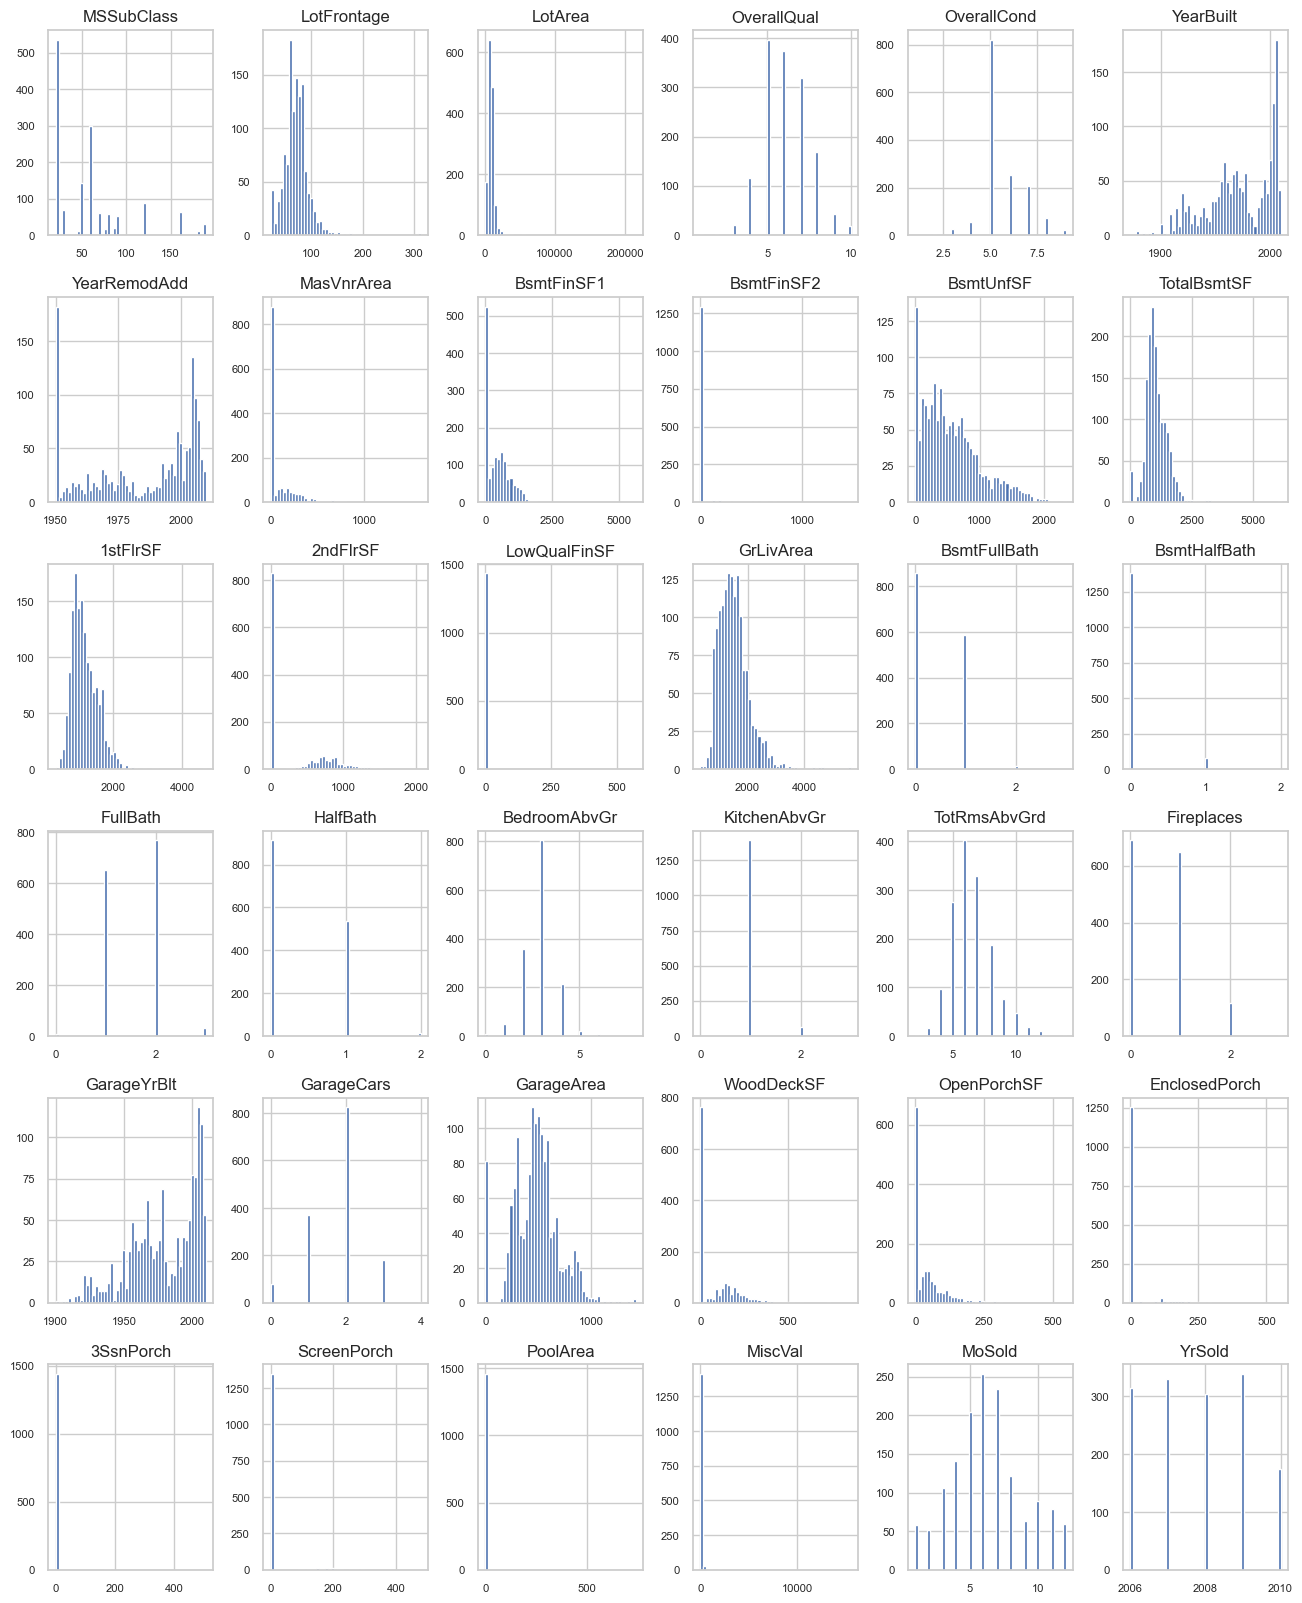

In [124]:
df_train[num_feature].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [125]:
# # cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# sns.pairplot(df_train[num_feature], height = 2.5)
# plt.show();

## 5.1. Sale Price

In [126]:
from scipy.stats import skew

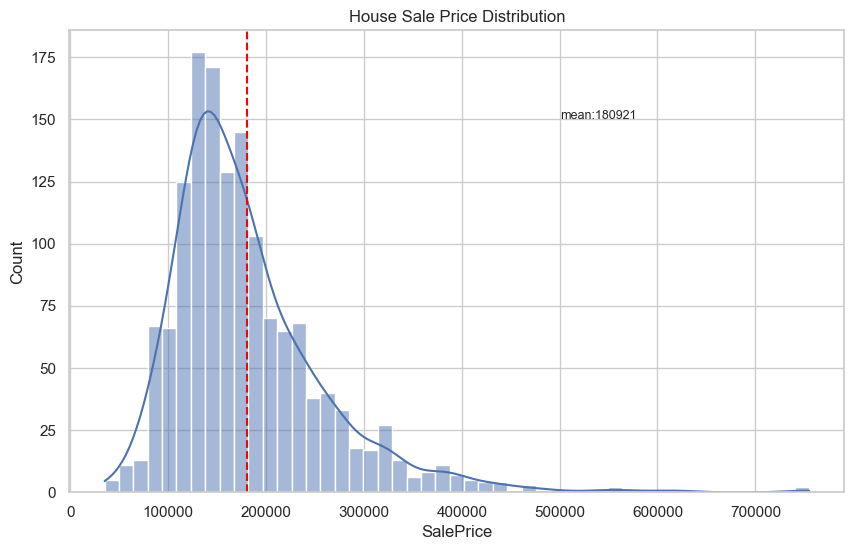

In [127]:
mean_price = round(df_train["SalePrice"].mean())

# Create a histogram with a specified color
plt.figure(figsize=(10, 6))
plt.title("House Sale Price Distribution")
ax = sns.histplot(df_train["SalePrice"], kde=True, color='b')
ax.axvline(x=mean_price, color='red', linestyle='--')
plt.text(500000, 150, f'mean:{mean_price}', fontsize=9)
plt.show()

## 5.2. Overall Quality

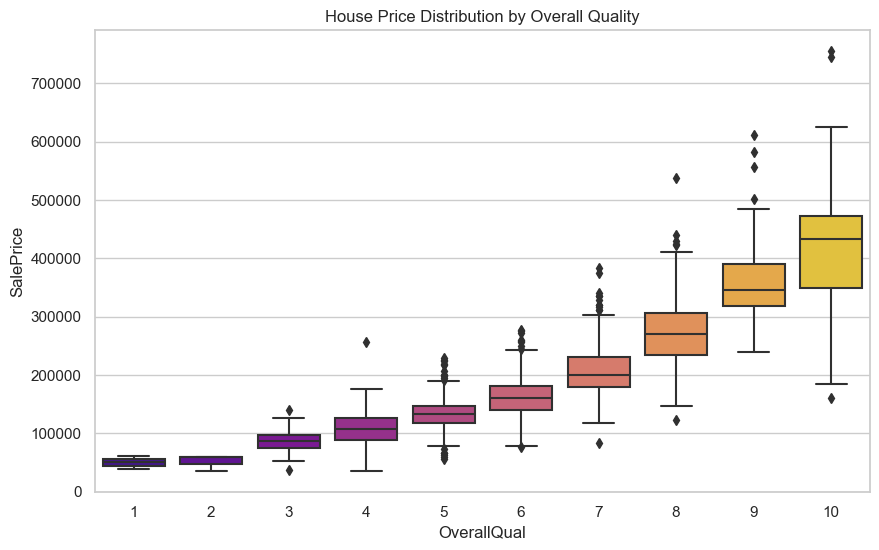

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train, palette='plasma')
title = plt.title('House Price Distribution by Overall Quality')

## 5.3. Lokasi

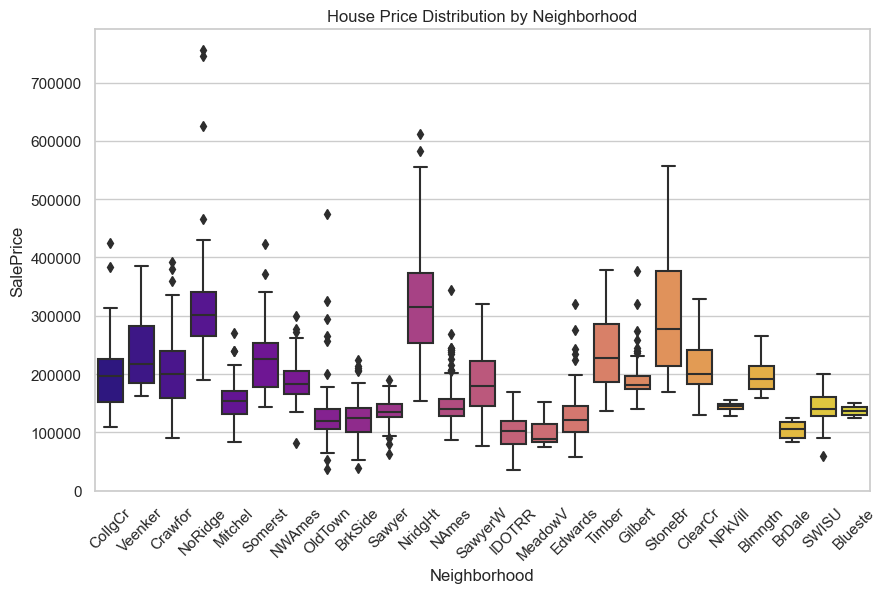

In [129]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train, palette='plasma')
title = plt.title('House Price Distribution by Neighborhood')
plt.tick_params(axis='x', labelrotation=45)

## 5.4. Living Area

Terdapat dua data mengandung outlier, di mana properti tersebut memiliki living area yang luas namun harganya justru rendah.

<Figure size 1000x600 with 0 Axes>

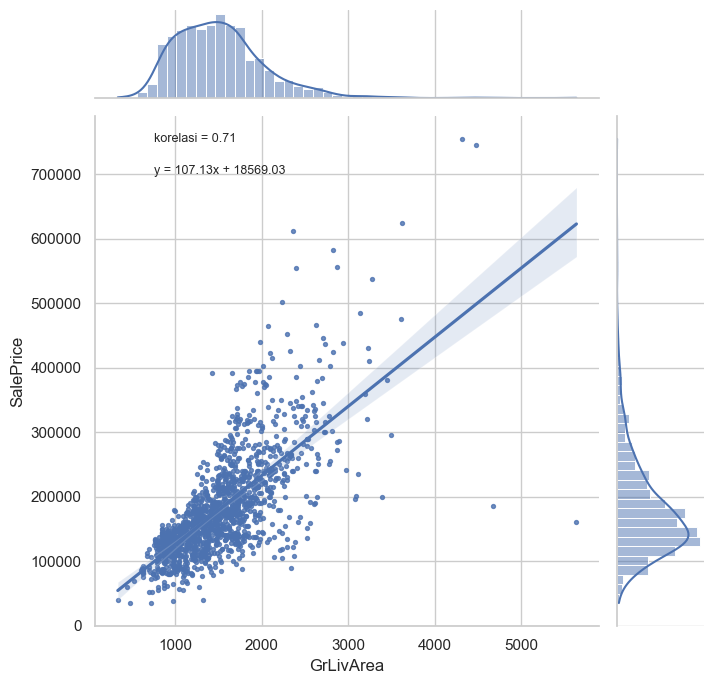

In [130]:
# calculate correlation
_correlation = df_train["GrLivArea"].corr(df_train["SalePrice"])

# calculate regression equation
slope, intercept, r_value, p_value, std_err = stats.linregress(df_train["GrLivArea"], df_train["SalePrice"])
lin_eq = f"y = {slope:.2f}x + {intercept:.2f}"


# Create jointplot
plt.figure(figsize=(10, 6))
sns.jointplot(x=df_train["GrLivArea"],
              y=df_train["SalePrice"],
              kind='reg',
              height=7,
              scatter_kws={'s': 8},
              marginal_kws={'kde': True})
plt.text(750, 750000,f'korelasi = {_correlation:.2f}', fontsize=9)
plt.text(750, 700000,f'{lin_eq}', fontsize=9)
plt.show()

## 5.5. Year Built

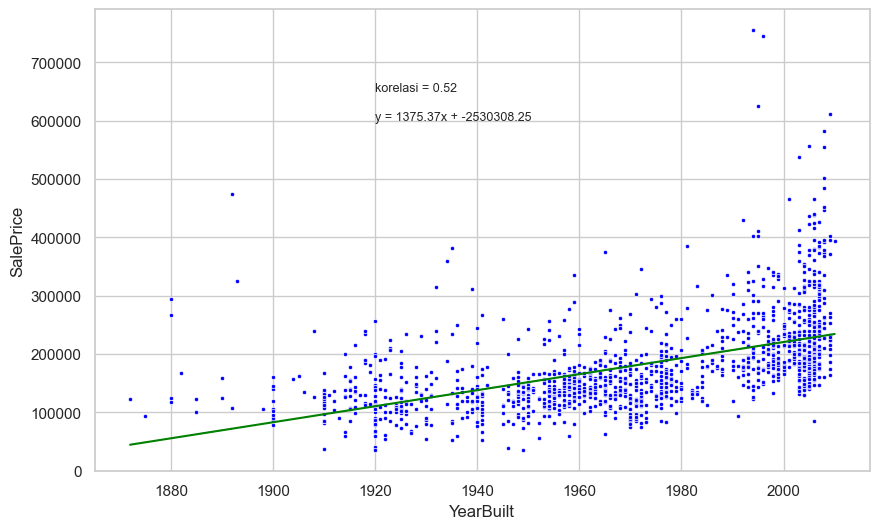

In [131]:
# calculate correlation
_correlation = df_train["YearBuilt"].corr(df_train["SalePrice"])

# calculate regression equation
slope, intercept, r_value, p_value, std_err = stats.linregress(df_train["YearBuilt"], df_train["SalePrice"])
lin_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x="YearBuilt", y="SalePrice", color='blue', marker='.')
sns.lineplot(data=df_train, x="YearBuilt", y=intercept + slope * df_train["YearBuilt"], color="green")
plt.text(1920, 650000,f'korelasi = {_correlation:.2f}', fontsize=9)
plt.text(1920, 600000, f'{lin_eq}', fontsize=9)
plt.show()

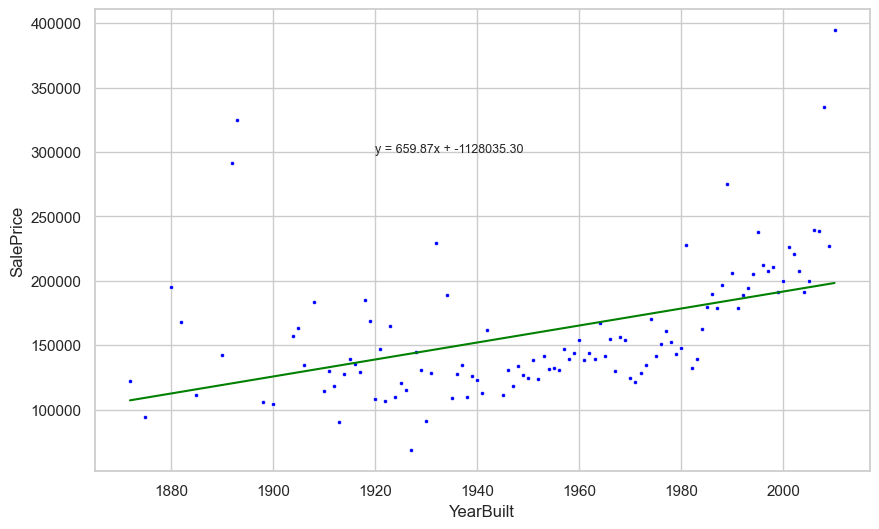

In [132]:
# average Year Built per year
plt.figure(figsize=(10, 6))
avg_price_yearbuilt = df_train.groupby('YearBuilt')['SalePrice'].median()
df_avg_price = avg_price_yearbuilt.reset_index()

slope, intercept, r_value, p_value, std_err = stats.linregress(df_avg_price["YearBuilt"], df_avg_price["SalePrice"])
lin_eq = f"y = {slope:.2f}x + {intercept:.2f}"

sns.scatterplot(data=df_avg_price, x="YearBuilt", y="SalePrice", color='blue', marker='.')
sns.lineplot(data=df_avg_price, x="YearBuilt", y=intercept + slope * df_avg_price["YearBuilt"], color="green")
plt.text(1920, 300000, f'{lin_eq}', fontsize=9)
plt.show()

## 5.6. Year Sold

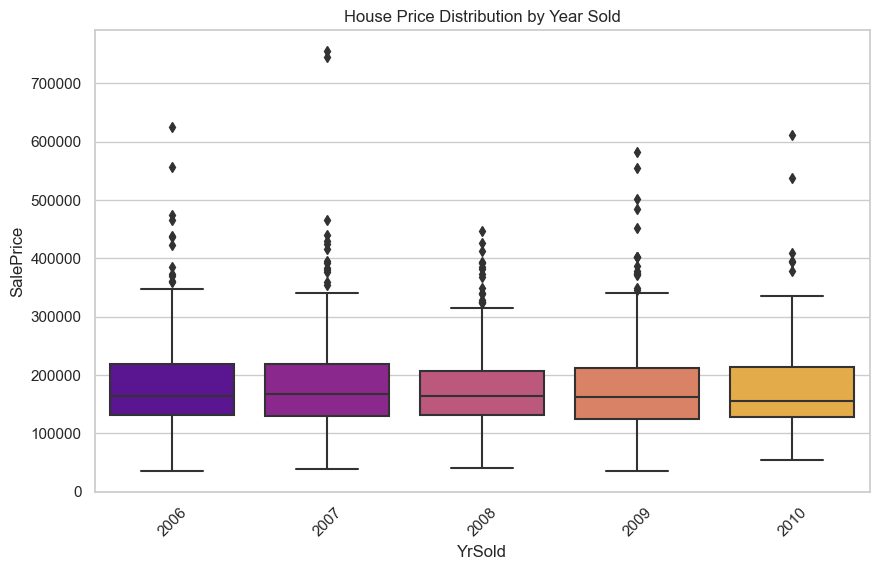

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='YrSold', y='SalePrice', data=df_train, palette='plasma')
title = plt.title('House Price Distribution by Year Sold')
plt.tick_params(axis='x', labelrotation=45)

# 6. Preprocessing

## 6.3. Handle Missing Value

Ada 19 features yang memiliki missing value.

In [134]:
# # which column have null value?
col_miss_value = df_train.columns[df_train.isnull().sum() > 0].tolist()

missing_data_count = df_train[col_miss_value].isnull().sum()
missing_data_percent = round(df_train[col_miss_value].isnull().sum() / len(X) * 100, 2)

missing_data = pd.DataFrame({
    'Feature': col_miss_value,
    'Count': missing_data_count,
    'Percent': missing_data_percent
})

missing_data.sort_values(by='Count', ascending=False, inplace=True)
missing_data.reset_index(drop=True, inplace=True)
missing_data

Feature  Count  Percent
0         PoolQC   1453    99.52
1    MiscFeature   1406    96.30
2          Alley   1369    93.77
3          Fence   1179    80.75
4     MasVnrType    872    59.73
5    FireplaceQu    690    47.26
6    LotFrontage    259    17.74
7     GarageType     81     5.55
8    GarageYrBlt     81     5.55
9   GarageFinish     81     5.55
10    GarageQual     81     5.55
11    GarageCond     81     5.55
12  BsmtFinType2     38     2.60
13  BsmtExposure     38     2.60
14  BsmtFinType1     37     2.53
15      BsmtCond     37     2.53
16      BsmtQual     37     2.53
17    MasVnrArea      8     0.55
18    Electrical      1     0.07

Ada beberapa pola handling missing value berdasarkan info dari deskripsi data:
1. Case 1: Feature kategorikal di mana NA artinya properti tidak memiliki fitur tersebut
2. Case 2: Feature numerikal di mana NA artinya properti tidak memiliki fitur tersebut
3. Case 3: kasus khusus dengan penanganan case by case

In [135]:
# Case 1: Feature kategorikal dimana NA artinya tidak memiliki fitur tersebut
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna("NoFireplace")
df_train['GarageType']=df_train['GarageType'].fillna("NoGarage")
df_train['GarageFinish']=df_train['GarageFinish'].fillna("NoGarage")
df_train['GarageQual']=df_train['GarageQual'].fillna("NoGarage")
df_train['GarageCond']=df_train['GarageCond'].fillna("NoGarage")
df_train['Alley']=df_train['Alley'].fillna("NoAlleyAccess")
df_train['MasVnrType']=df_train['MasVnrType'].fillna("None")
df_train['BsmtQual']=df_train['BsmtQual'].fillna("NoBasement")
df_train['BsmtCond']=df_train['BsmtCond'].fillna("NoBasement")
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna("NoBasement")
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna("NoBasement")
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna("NoBasement")
df_train['PoolQC']=df_train['PoolQC'].fillna("NoPool")
df_train['Fence']=df_train['Fence'].fillna("NoFence")
df_train['MiscFeature']=df_train['MiscFeature'].fillna("None")


# Case 2: Feature numerikal di mana NA artinya properti tidak memiliki fitur tersebut
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(0)


# Case 3: kasus khusus dengan penanganan case by case
# NA dikonversi pake median (karena LotFrontage distribusi data cukup skew 2.16)
df_train["LotFrontage"]=df_train["LotFrontage"].fillna(df_train["LotFrontage"].median())

# NA dikonversi pakai mode
df_train['Electrical']=df_train['Electrical'].fillna(df_train["Electrical"].mode()[0])

# NA dikonversi menjadi sama dengan feature YearBuilt (asumsi tahun dibuat rumah dan garasi sama)
df_train['GarageYrBlt']=df_train['GarageYrBlt'].fillna(df_train["YearBuilt"])

## 6.4. Handle Outlier

### Living Area

In [136]:
outlier_index = df_train[(df_train["GrLivArea"] > 4000) & (df_train["SalePrice"] < 200000)].index.tolist()
colors = ['crimson' if  idx in outlier_index else 'blue' for idx in df_train.index]

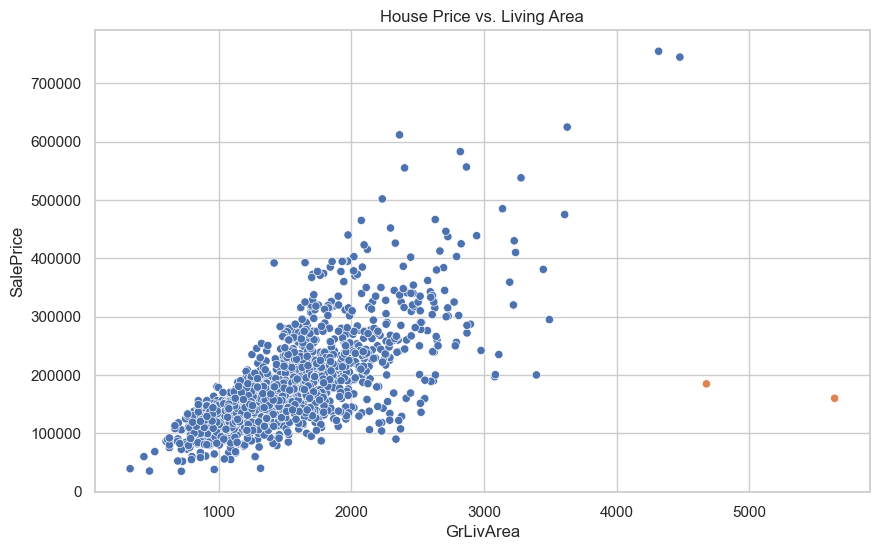

In [137]:
#sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train, hue=colors, legend=False)
title = plt.title('House Price vs. Living Area')

In [138]:
# drop the outliers
outlier_index = df_train[(df_train["GrLivArea"] > 4000) & (df_train["SalePrice"] < 200000)].index
df_train.drop(outlier_index, axis=0, inplace=True)

## 6.5. Feature Engineering

In [139]:
df_train['totalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['totalBathroom'] = df_train.FullBath + df_train.BsmtFullBath + 0.5 * (df_train.HalfBath + df_train.BsmtHalfBath)
df_train['houseAge'] = df_train['YrSold'] - df_train['YearBuilt']
# df_train['reModeled'] = np.where(df_train['YearRemodAdd'] == df_train['YearBuilt'], 0, 1)
# df_train['isNew'] = np.where(df_train['YrSold'] == df_train['YearBuilt'], 1, 0)

### Luas Area Rumah

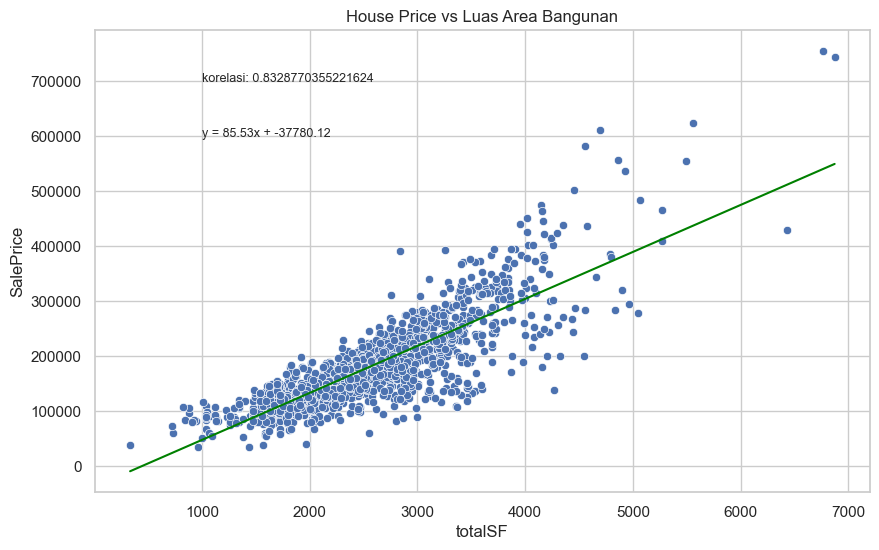

In [140]:
# calculate correlation
_correlation = df_train["totalSF"].corr(df_train["SalePrice"])

slope, intercept, r_value, p_value, std_err = stats.linregress(df_train["totalSF"], df_train["SalePrice"])
lin_eq = f"y = {slope:.2f}x + {intercept:.2f}"

#sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='totalSF', y='SalePrice', data=df_train, legend=False)
sns.lineplot(data=df_train, x="totalSF", y=intercept + slope * df_train["totalSF"], color="green")
plt.text(1000, 700000, f'korelasi: {_correlation}', fontsize=9)
plt.text(1000, 600000, f'{lin_eq}', fontsize=9)
title = plt.title('House Price vs Luas Area Bangunan')

## 6.6. Correlation with Sales Price

In [141]:
# cols = num_feature + ['SalePrice'] + ['totalSF','houseAge','reModeled','isNew','totalBathroom']
cols = num_feature + ['SalePrice'] + ['totalSF','houseAge','totalBathroom']
correlations = df_train[cols].corr()['SalePrice']


# exclude index "SalePrice"
correlations = correlations[correlations.index != 'SalePrice']

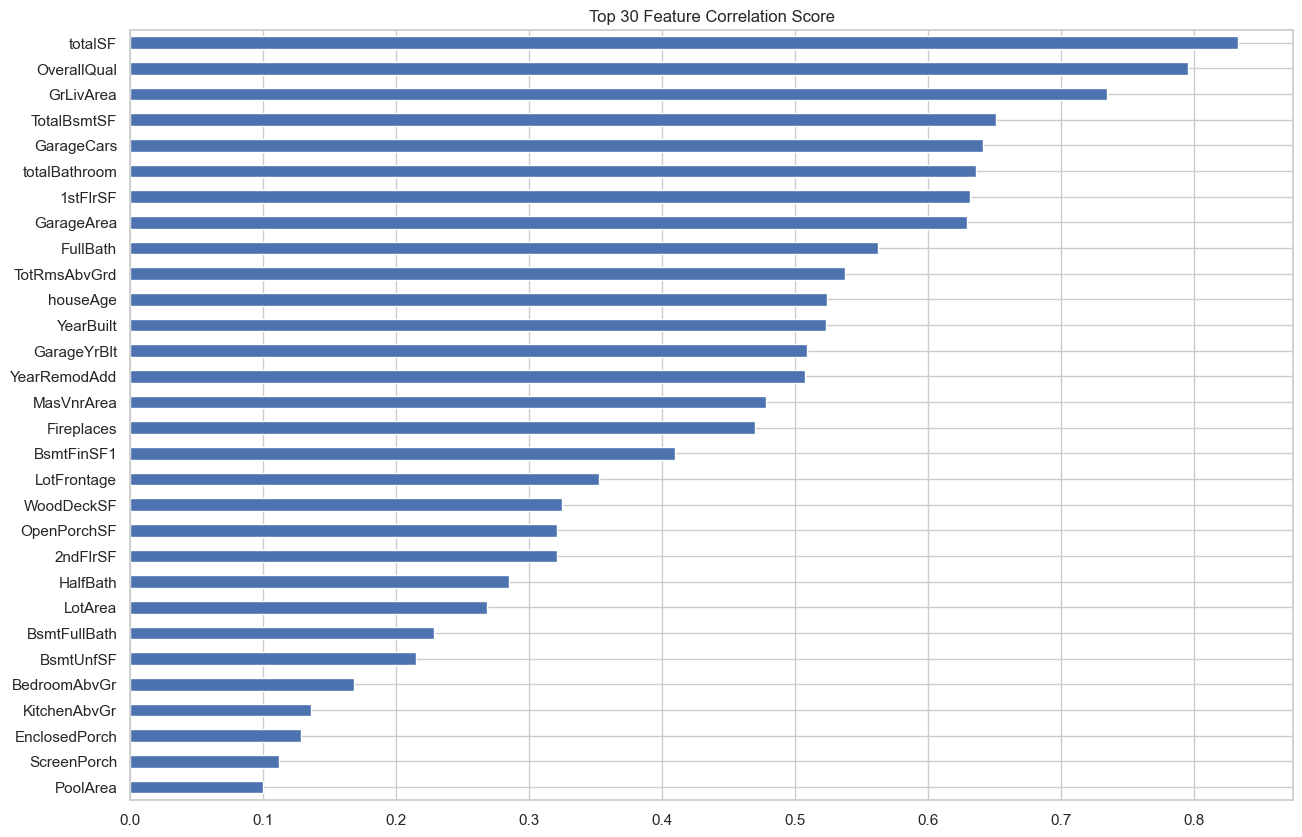

In [142]:
plt.figure(figsize=(15, 10))
abs(correlations).nlargest(30).sort_values(ascending=True).plot(kind='barh')
plt.title('Top 30 Feature Correlation Score')
plt.show()

totalSF and OverallQuall

## 6.1. Check Multicollinearity of numerical features (using correlation analysis)

In [143]:
# # Create correlation matrix from train data excluding `SalePrice`
# df_train_num = df_train[num_feature]
# corr_mat = df_train_num.corr()

# # Select correlations greater than 0.5
# high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# # Plot correlation heatmap
# mask = np.triu(np.ones_like(high_corr_mat, dtype=bool))
# plt.figure(figsize=(15, 10))
# sns.heatmap(high_corr_mat,
#             annot=True,            
#             mask=mask,
#             fmt='.1f',
#             cmap='viridis',
#             vmin=0.5,
#             vmax=1)
# title = plt.title('Correlation Heatmap\n (numerical features)')

Dengan threshold correlation > 0.8 , terdapat beberapa pasangan feature numerikal yang bersifat multilcollinearity:
- 1stFlrSF dan TotalBsmtSF (correlation: 0.82)
- GrLivArea dan TotRmsAbvGrd (correlation: 0.83)
- GarageYrBlt dan YearBuilt (correlation: 0.83)
- GarageCars dan GarageArea (correlation: 0.88)

In [144]:
# 1stFlrSF dan TotalBsmtSF

## 6.7. Fixing Skewness dan Normalisasi Data

In [145]:
# def normality_plot(X):
#     """
#     1. Draw distribution plot with normal distribution fitted curve
#     2. Draw Quantile-Quantile plot 
#     """
#     fig, axes = plt.subplots(1, 2, figsize=(10, 6))

#     sns.histplot(X, kde=True, ax=axes[0])
#     axes[0].tick_params(axis='x', labelrotation=45)
#     axes[0].set_title('Distribution Plot')

#     axes[1] = stats.probplot((X), plot=plt)
#     plt.tight_layout()

In [146]:
# normality_plot(df_train["SalePrice"])

In [147]:
# # log transformation
# df_train['SalePrice'] = np.log(1 + df_train['SalePrice'])

In [148]:
# normality_plot(df_train['SalePrice'])

**Skewness**

- skewness < -1 OR > 1: highly skewed
- skewness between -1 and -0.5 OR between 0.5 and 1: moderately skewed
- skewness between -0.5 and 0.5: approximately symmetric

In [149]:
# normality_plot(df_train['GrLivArea'])

In [150]:
# # List of skewed columns
# skewness = df_train[num_feature].skew().sort_values(ascending=False)
# skewed_cols = list(skewness[abs(skewness) > 0.5].index)

# # Remove 'MSSubClass' and 'SalePrice'
# skewed_cols = [
#     col for col in skewed_cols if col not in ['MSSubClass', 'SalePrice']
# ]

# # Log-transform skewed columns
# for col in skewed_cols:
#     df_train[col] = np.log(1 + df_train[col])

In [151]:
# normality_plot(df_train['GrLivArea'])

# 6.8. Feature Scaling

Jika pakai model regression perlu feature scaling.

Untuk model decision tree atau random forest relatif aman tanpa feature scaling.

In [152]:
# from sklearn.preprocessing import RobustScaler
# numerical_cols = list(df_train.select_dtypes(exclude=['object']).columns)
# scaler = RobustScaler()
# df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])

# 6.2. Transform Feature Kategorical (using One-Hot Encoding)

In [153]:
df_train_transformed = df_train.copy()

# process categorical data (one-hot-encoding)
for var in cat_feature:
    cat_list = pd.get_dummies(df_train_transformed[var], prefix=var)
    data1 = df_train_transformed.join(cat_list)
    df_train_transformed = data1


In [154]:
# remove the categorical cata
data_vars = df_train_transformed.columns.values.tolist()
to_keep = [i for i in df_train_transformed if i not in cat_feature] # filter process

df_train_transformed = df_train_transformed[to_keep]

In [155]:
df_train_transformed.shape

(1458, 305)

## 6.10. Feature Importance

In [221]:
from sklearn.ensemble import RandomForestRegressor

In [222]:
X = df_train_transformed.drop('SalePrice', axis=1)
y = df_train_transformed['SalePrice']

In [223]:
base_rf = RandomForestRegressor(max_features=70,random_state = 3)
base_rf.fit(X, y)

RandomForestRegressor(max_features=70, random_state=3)

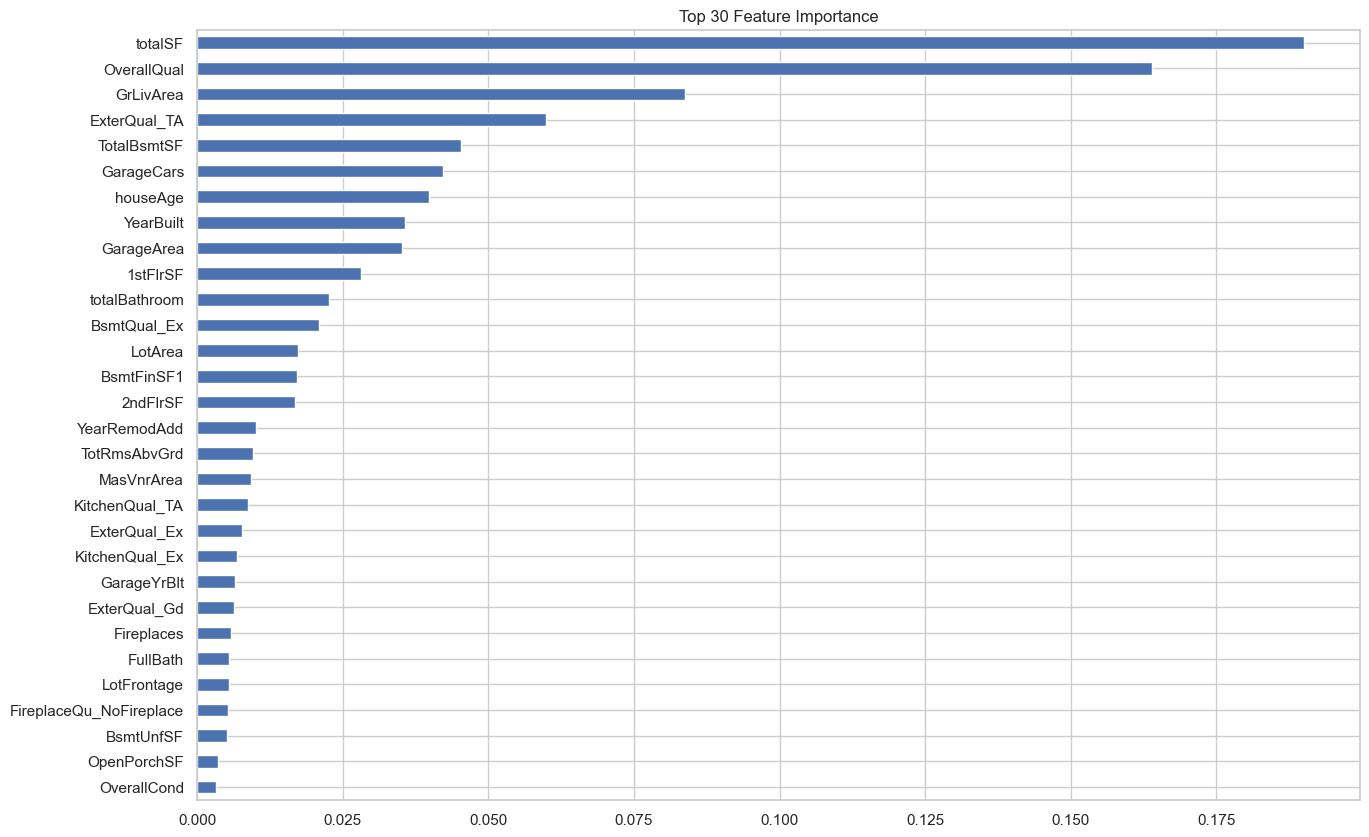

In [224]:
plt.figure(figsize=(15, 10))
feature_importances = pd.Series(base_rf.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.nlargest(30).sort_values(ascending=False)
abs(feature_importances).nlargest(30).sort_values(ascending=True).plot(kind='barh')
plt.title('Top 30 Feature Importance')
plt.show()

totalSF dan OverallQual menjadi feature dengan importance paling tinggi.

# 7. Random Forest Model Development

In [160]:
# from sklearn.model_selection import KFold, cross_val_score

# n_folds = 5


# def cvGetRMSE(model):
#     """
#     Return the average RMSLE over all folds of training data.
#     """
#     # Set KFold to shuffle data before the split
#     kf = KFold(n_folds, shuffle=True, random_state=42)

#     # Get RMSLE score
#     rmse = np.sqrt(-cross_val_score(
#         model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf))

#     return rmse.mean()

## 7.1. baseline RF

### Split Data intro Feature and Target Variable

In [161]:
from sklearn.model_selection import train_test_split

#evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [162]:
X = df_train_transformed.drop('SalePrice', axis=1)
y = df_train_transformed['SalePrice']
feature_train = X.columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 3)

## check nilai parameter max_features terbaik

In [163]:
mx_ftr_list = []
mae_list = []
mse_list = []
rmse_list = []
r2_list = []


for mx_ftr in [30,40,50,60,70,80]:
    base_rf = RandomForestRegressor(max_features=mx_ftr, random_state = 3)
    base_rf.fit(X_train, y_train)
    y_test_pred = base_rf.predict(X_test)
    
    # calculate metrics
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = sqrt(mean_squared_error(y_test, y_test_pred))
    r2score = r2_score(y_test, y_test_pred)
    
    # append data
    mx_ftr_list.append(mx_ftr)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2score)
    
df_eval = pd.DataFrame({
    "max_features": mx_ftr_list,
    "mae": mae_list,
    "mse": mse_list,
    "rmse": rmse_list,
    "r2": r2_list
})

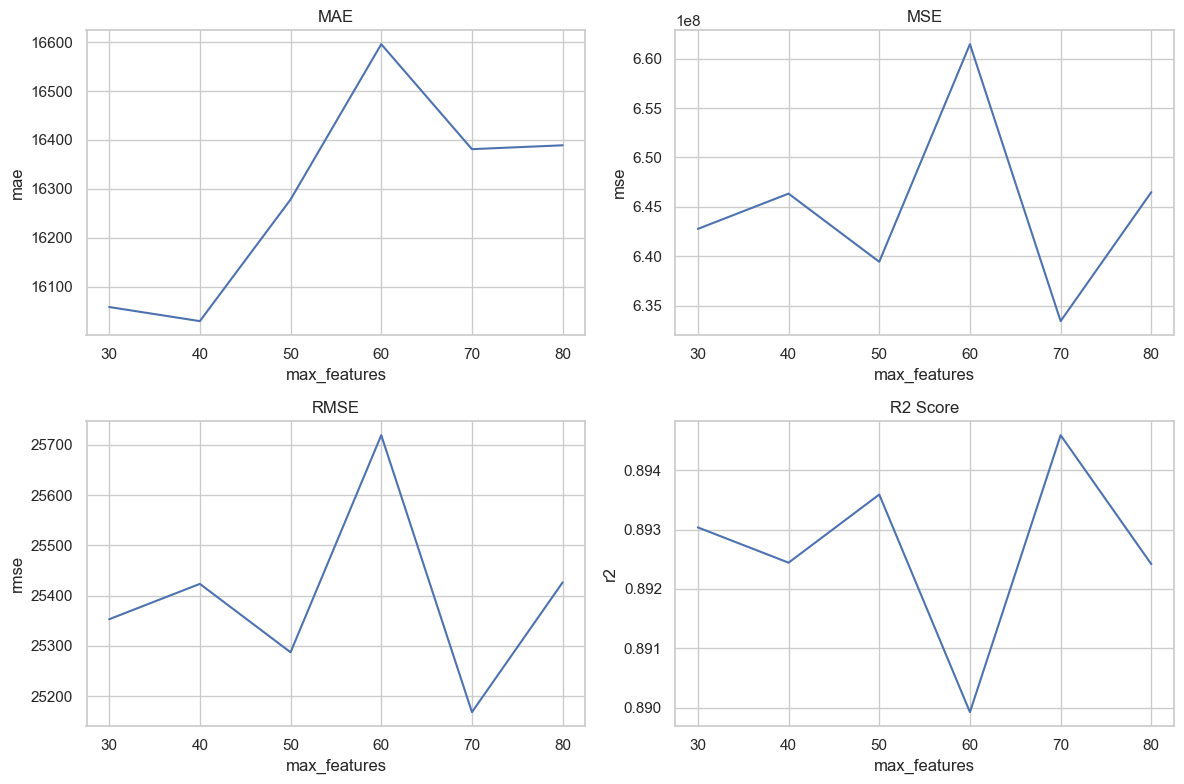

In [164]:
### max features vs metrics evaluations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.lineplot(data=df_eval, x="max_features", y="mae" ,ax=axes[0, 0]).set_title("MAE")
sns.lineplot(data=df_eval, x="max_features", y="mse",ax=axes[0, 1]).set_title("MSE")
sns.lineplot(data=df_eval, x="max_features", y="rmse" ,ax=axes[1, 0]).set_title("RMSE")
sns.lineplot(data=df_eval, x="max_features", y="r2" ,ax=axes[1, 1]).set_title("R2 Score")
plt.tight_layout()
plt.show()

### Best Baseline RF

In [174]:
base_rf = RandomForestRegressor(max_features=70, random_state = 3)
base_rf.fit(X_train, y_train)
y_test_pred = base_rf.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_test_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"R^2: {r2_score(y_test, y_test_pred)}")

MAE: 16381.241506849317
MSE: 633428828.5523713
RMSE: 25168.01201033509
R^2: 0.8945913736076543


## 7.2. RF with feature importance

In [166]:
important_features = feature_importances_sorted.index.tolist()
df_train_transformed_ftr_imp = df_train_transformed[important_features + ['SalePrice']] 

In [167]:
X = df_train_transformed_ftr_imp.drop('SalePrice', axis=1)
y = df_train_transformed_ftr_imp['SalePrice']

feature_train = X.columns.tolist()

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 3)

In [169]:
model_rf = RandomForestRegressor(max_features=30, random_state=3)
model_rf.fit(X_train, y_train)
y_test_pred = model_rf.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_test_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"R^2: {r2_score(y_test, y_test_pred)}")

MAE: 17558.111780821917
MSE: 704116807.0497115
RMSE: 26535.19939721033
R^2: 0.8828282166751147


## 7.3. RF with gridSearchCV

In [170]:
X = df_train_transformed.drop('SalePrice', axis=1)
y = df_train_transformed['SalePrice']

feature_train = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 3)

In [171]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    #'max_features': [30, 40, 50, 60, 70],
    'n_estimators': [100, 200, 300],
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=3)

# Create the GridSearchCV object with the specified parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on the dataset
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score (MSE):", -best_score)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score (MSE): 814869455.8674715


In [172]:
best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [69]:
best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [173]:
model_rf_gridcv = RandomForestRegressor(
    	max_features = 70,
         max_depth=int(best_params['max_depth']),
         n_estimators=int(best_params['n_estimators']),
         min_samples_leaf=int(best_params['min_samples_leaf']),
         min_samples_split=int(best_params['min_samples_split']),
         random_state=3
         )

model_rf_gridcv.fit(X_train, y_train)
y_test_pred = model_rf_gridcv.predict(X_test)


print(f"MAE: {mean_absolute_error(y_test, y_test_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"R^2: {r2_score(y_test, y_test_pred)}")

MAE: 16412.092142172314
MSE: 657600387.0517819
RMSE: 25643.72022643715
R^2: 0.8905689946688744


In [70]:
model_rf_gridcv = RandomForestRegressor(
    	#max_features = 70,
         max_depth=int(best_params['max_depth']),
         n_estimators=int(best_params['n_estimators']),
         min_samples_leaf=int(best_params['min_samples_leaf']),
         min_samples_split=int(best_params['min_samples_split']),
         random_state=3
         )

model_rf_gridcv.fit(X_train, y_train)
y_test_pred = model_rf_gridcv.predict(X_test)


print(f"MAE: {mean_absolute_error(y_test, y_test_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"R^2: {r2_score(y_test, y_test_pred)}")

MAE: 17060.44184941323
MSE: 689601801.0015446
RMSE: 26260.270390868875
R^2: 0.8852436527598766


## 7.4. RF with bayesian optimization (for hyperparameter tuning)

In [ ]:
X = df_train_transformed.drop('SalePrice', axis=1)
y = df_train_transformed['SalePrice']

feature_train = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 3)

In [71]:
from hyperopt import hp, fmin, tpe

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from hyperopt import hp, fmin, tpe

# Define the objective function
def objective(params):
    # Define the Random Forest Regressor model with the given hyperparameters
    model = RandomForestRegressor(random_state=3,
                                    n_estimators=int(params['n_estimators']),
                                  max_depth=int(params['max_depth']),
                                  min_samples_split=int(params['min_samples_split']),
                                  min_samples_leaf=int(params['min_samples_leaf']))
    
    # Perform cross-validation and calculate the negative mean squared error (MSE)
    scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    
    return mean_score

# Define the hyperparameter search space
space = {
    'max_features': hp.quniform('max_features', 40, 50, 60),
    'n_estimators': hp.quniform('n_estimators', 100, 500, 100),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 5, 1)
}

# Run the hyperparameter search
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=35)

100%|██████████████████████████████████████████████████| 35/35 [13:36<00:00, 23.32s/trial, best loss: 677838410.085384]


In [72]:
best

{'max_depth': 10.0,
 'min_samples_leaf': 1.0,
 'min_samples_split': 2.0,
 'n_estimators': 500.0}

In [73]:
model_rf_opt = RandomForestRegressor(
         max_depth=int(best['max_depth']),
         n_estimators=int(best['n_estimators']),
         min_samples_leaf=int(best['min_samples_leaf']),
         min_samples_split=int(best['min_samples_split']),
         random_state=3
         )

model_rf_opt.fit(X_train, y_train)
y_test_pred = model_rf_opt.predict(X_test)


print(f"MAE: {mean_absolute_error(y_test, y_test_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"R^2: {r2_score(y_test, y_test_pred)}")

MAE: 17068.81988219759
MSE: 689562277.7414253
RMSE: 26259.517850513275
R^2: 0.8852502298090602


In [ ]:
# from sklearn.model_selection import KFold, cross_val_score

# # Create random forest regressor model
# model = RandomForestRegressor()

# # Perform cross-validation
# n_folds = 5
# kf = KFold(n_folds, shuffle=True, random_state=3)
# rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))

# # Evaluate performance
# print("Cross-Validation Scores:", rmse)
# print("Mean Cross-Validation Score:", np.mean(rmse))

In [74]:
df_test.shape

(1459, 79)

# Predicting New Testing Dataset

In [175]:
testing_data = pd.read_csv('Dataset/test.csv', index_col='Id')

### handle missing value

In [176]:
# # which column have null value?
col_miss_value = df_test.columns[df_test.isnull().sum() > 0].tolist()

missing_data_count = df_test[col_miss_value].isnull().sum()
missing_data_percent = round(df_test[col_miss_value].isnull().sum() / len(X) * 100, 2)

missing_data = pd.DataFrame({
    'Feature': col_miss_value,
    'Count': missing_data_count,
    'Percent': missing_data_percent
})

missing_data.sort_values(by='Count', ascending=False, inplace=True)
missing_data.reset_index(drop=True, inplace=True)
missing_data

Feature  Count  Percent
0         PoolQC   1456    99.86
1    MiscFeature   1408    96.57
2          Alley   1352    92.73
3          Fence   1169    80.18
4     MasVnrType    894    61.32
5    FireplaceQu    730    50.07
6    LotFrontage    227    15.57
7     GarageCond     78     5.35
8    GarageYrBlt     78     5.35
9     GarageQual     78     5.35
10  GarageFinish     78     5.35
11    GarageType     76     5.21
12      BsmtCond     45     3.09
13  BsmtExposure     44     3.02
14      BsmtQual     44     3.02
15  BsmtFinType1     42     2.88
16  BsmtFinType2     42     2.88
17    MasVnrArea     15     1.03
18      MSZoning      4     0.27
19  BsmtFullBath      2     0.14
20  BsmtHalfBath      2     0.14
21    Functional      2     0.14
22     Utilities      2     0.14
23    GarageCars      1     0.07
24    GarageArea      1     0.07
25   TotalBsmtSF      1     0.07
26   KitchenQual      1     0.07
27     BsmtUnfSF      1     0.07
28    BsmtFinSF2      1     0.07
29    BsmtFinSF1      1     0.07
30   Exterior2nd      1     0.07
31   Exterior1st      1     0.07
32      SaleType      1     0.07

In [177]:
# Case 1: Feature kategorikal dimana NA artinya tidak memiliki fitur tersebut
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna("NoFireplace")
df_test['GarageType']=df_test['GarageType'].fillna("NoGarage")
df_test['GarageFinish']=df_test['GarageFinish'].fillna("NoGarage")
df_test['GarageQual']=df_test['GarageQual'].fillna("NoGarage")
df_test['GarageCond']=df_test['GarageCond'].fillna("NoGarage")
df_test['Alley']=df_test['Alley'].fillna("NoAlleyAccess")
df_test['MasVnrType']=df_test['MasVnrType'].fillna("None")
df_test['BsmtQual']=df_test['BsmtQual'].fillna("NoBasement")
df_test['BsmtCond']=df_test['BsmtCond'].fillna("NoBasement")
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna("NoBasement")
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna("NoBasement")
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna("NoBasement")
df_test['PoolQC']=df_test['PoolQC'].fillna("NoPool")
df_test['Fence']=df_test['Fence'].fillna("NoFence")
df_test['MiscFeature']=df_test['MiscFeature'].fillna("None")


# Case 2: Feature numerikal di mana NA artinya properti tidak memiliki fitur tersebut
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(0)


# Case 3: kasus khusus dengan penanganan case by case
# NA dikonversi pake median (karena LotFrontage distribusi data cukup skew 2.16)
df_test["LotFrontage"]=df_test["LotFrontage"].fillna(df_test["LotFrontage"].median())

# NA dikonversi pakai mode
df_test['Electrical']=df_test['Electrical'].fillna(df_test["Electrical"].mode()[0])

# NA dikonversi menjadi sama dengan feature YearBuilt (asumsi tahun dibuat rumah dan garasi sama)
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(df_test["YearBuilt"])

In [178]:
# # which column have null value?
col_miss_value = df_test.columns[df_test.isnull().sum() > 0].tolist()

missing_data_count = df_test[col_miss_value].isnull().sum()
missing_data_percent = round(df_test[col_miss_value].isnull().sum() / len(X) * 100, 2)

missing_data = pd.DataFrame({
    'Feature': col_miss_value,
    'Count': missing_data_count,
    'Percent': missing_data_percent
})

missing_data.sort_values(by='Count', ascending=False, inplace=True)
missing_data.reset_index(drop=True, inplace=True)
missing_data

Feature  Count  Percent
0       MSZoning      4     0.27
1      Utilities      2     0.14
2   BsmtFullBath      2     0.14
3   BsmtHalfBath      2     0.14
4     Functional      2     0.14
5    Exterior1st      1     0.07
6    Exterior2nd      1     0.07
7     BsmtFinSF1      1     0.07
8     BsmtFinSF2      1     0.07
9      BsmtUnfSF      1     0.07
10   TotalBsmtSF      1     0.07
11   KitchenQual      1     0.07
12    GarageCars      1     0.07
13    GarageArea      1     0.07
14      SaleType      1     0.07

berhubung ada data yang masih kosong, kita drop saja data tersebut. Mengingat jumlah data tersebut tak banyak sepertinya tidak masalah (sekitar 12 data saja).

In [179]:
print(f"ukuran data sebelum didrop: {df_test.shape}")

ukuran data sebelum didrop: (1459, 79)


In [180]:
df_test = df_test.dropna()

In [181]:
print(f"ukuran data setelah didrop: {df_test.shape}")

ukuran data setelah didrop: (1447, 79)


### Feature Engineering

In [182]:
df_test['totalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']
df_test['totalBathroom'] = df_test.FullBath + df_test.BsmtFullBath + 0.5 * (df_test.HalfBath + df_test.BsmtHalfBath)
df_test['houseAge'] = df_test['YrSold'] - df_test['YearBuilt']
# df_test['reModeled'] = np.where(df_test['YearRemodAdd'] == df_test['YearBuilt'], 0, 1)
# df_test['isNew'] = np.where(df_test['YrSold'] == df_test['YearBuilt'], 1, 0)

### Transform feature categorical

In [183]:
df_test_transformed = df_test.copy()

# process categorical data (one-hot-encoding)
for var in cat_feature:
    cat_list = pd.get_dummies(df_test_transformed[var], prefix=var)
    data1 = df_test_transformed.join(cat_list)
    df_test_transformed = data1

    
# remove the categorical cata
data_vars = df_test_transformed.columns.values.tolist()
to_keep = [i for i in df_test_transformed if i not in cat_feature] # filter process

df_test_transformed = df_test_transformed[to_keep]

In [184]:
df_test_transformed.shape

(1447, 286)

### Handle feature tak ada di data testing

In [185]:
columns_A = set(df_train_transformed.columns)
columns_B = set(df_test_transformed.columns)

columns_only_in_A = columns_A - columns_B
columns_only_in_B = columns_B - columns_A

print("Columns present only in DataFrame A:", columns_only_in_A)
print("Columns present only in DataFrame B:", columns_only_in_B)

list_add_cols = list(columns_only_in_A)

Columns present only in DataFrame A: {'Exterior1st_CBlock', 'Utilities_NoSeWa', 'Heating_Floor', 'PoolQC_Fa', 'SalePrice', 'RoofMatl_Membran', 'MiscFeature_TenC', 'Condition2_RRNn', 'Exterior1st_ImStucc', 'HouseStyle_2.5Fin', 'RoofMatl_Roll', 'Condition2_RRAe', 'GarageQual_Ex', 'Heating_OthW', 'Electrical_Mix', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Condition2_RRAn', 'RoofMatl_Metal'}
Columns present only in DataFrame B: set()


In [188]:
for col in list_add_cols:
    df_test_transformed.loc[:, col] = 0
    
df_test_transformed = df_test_transformed.loc[:,feature_train]

### predict the data

In [190]:
y_test_pred_test = base_rf.predict(df_test_transformed)
y_test_pred_test = np.round(y_test_pred_test)

In [191]:
len(y_test_pred_test)

1447

In [192]:
df_test['PredSalesPrice'] = y_test_pred_test

# Final Submission Testing Data Prediction

In [193]:
testing_data.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [194]:
# left join dataframe original testing data dan testing data yg udah diproses 
final_df = pd.merge(testing_data, df_test[['Id','PredSalesPrice']], on='Id',how='left')

In [195]:
final_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0  1461          20       RH         80.0    11622   Pave   NaN      Reg  \
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr  \
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt   
0       Norm     1Fam     1Story            5            6       1961  \
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN  \
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure   
0         0.0        TA        TA     CBlock       TA       TA           No  \
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0          Rec       468.0          LwQ       144.0      270.0        882.0  \
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF   
0    GasA        TA          Y      SBrkr       896         0             0  \
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
0        896           0.0           0.0         1         0             2  \
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu   
0             1          TA             5        Typ           0         NaN  \
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [196]:
# submit into new file
final_df.to_csv('./Dataset/prediction_result.csv', index=False)

# Checking data prediction results

In [197]:
df_result = pd.read_csv('./Dataset/prediction_result.csv', index_col='Id')

In [198]:
df_result.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg  \
1462          20       RL         81.0    14267   Pave   NaN      IR1   
1463          60       RL         74.0    13830   Pave   NaN      IR1   
1464          60       RL         78.0     9978   Pave   NaN      IR1   
1465         120       RL         43.0     5005   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
Id                                                                       
1461         Lvl    AllPub    Inside       Gtl        NAmes      Feedr  \
1462         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
1463         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1464         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1465         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt   
Id                                                                         
1461       Norm     1Fam     1Story            5            6       1961  \
1462       Norm     1Fam     1Story            6            6       1958   
1463       Norm     1Fam     2Story            5            5       1997   
1464       Norm     1Fam     2Story            6            6       1998   
1465       Norm   TwnhsE     1Story            8            5       1992   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   
Id                                                                         
1461          1961     Gable  CompShg     VinylSd     VinylSd        NaN  \
1462          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1463          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
1464          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1465          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond   
Id                                                                  
1461         0.0        TA        TA     CBlock       TA       TA  \
1462       108.0        TA        TA     CBlock       TA       TA   
1463         0.0        TA        TA      PConc       Gd       TA   
1464        20.0        TA        TA      PConc       TA       TA   
1465         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2   
Id                                                                    
1461           No          Rec       468.0          LwQ       144.0  \
1462           No          ALQ       923.0          Unf         0.0   
1463           No          GLQ       791.0          Unf         0.0   
1464           No          GLQ       602.0          Unf         0.0   
1465           No          ALQ       263.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical   
Id                                                                     
1461      270.0        882.0    GasA        TA          Y      SBrkr  \
1462      406.0       1329.0    GasA        TA          Y      SBrkr   
1463      137.0        928.0    GasA        Gd          Y      SBrkr   
1464      324.0        926.0    GasA        Ex          Y      SBrkr   
1465     1017.0       1280.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath   
Id                                                                              
1461       896         0             0        896           0.0           0.0  \
1462      1329         0             0       1329           0.0           0.0   
1463       928       701             0       1629           0.0           0.0   
1464       926   

In [199]:
df_result.shape

(1459, 80)

### Check predicted sales price distribution

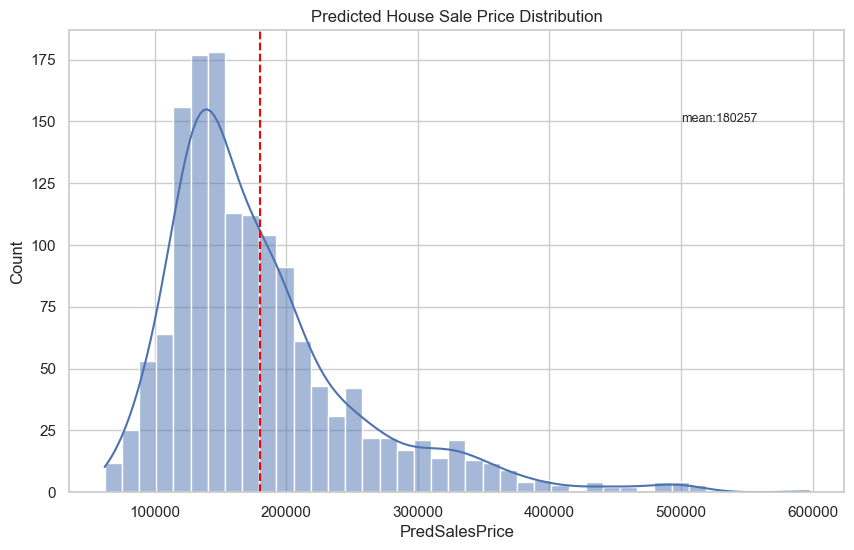

In [200]:
mean_price = round(df_result.PredSalesPrice.mean())

# Create a histogram with a specified color
plt.figure(figsize=(10, 6))
plt.title("Predicted House Sale Price Distribution")
ax = sns.histplot(df_result.PredSalesPrice, kde=True, color='b')
ax.axvline(x=mean_price, color='red', linestyle='--')
plt.text(500000, 150, f'mean:{mean_price}', fontsize=9)
plt.show()

# Explain The Result

In [235]:
df_test_transformed['PredSalesPrice'] = y_test_pred_test

In [236]:
df_test_transformed.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'PredSalesPrice'],
      dtype='object', length=305)

In [233]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley   
0  1461          20       RH         80.0    11622   Pave  NoAlleyAccess  \
1  1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2  1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3  1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4  1465         120       RL         43.0     5005   Pave  NoAlleyAccess   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
0      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr  \
1      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4      IR1         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt   
0       Norm     1Fam     1Story            5            6       1961  \
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   
0          1961     Gable  CompShg     VinylSd     VinylSd       None  \
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure   
0         0.0        TA        TA     CBlock       TA       TA           No  \
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0          Rec       468.0          LwQ       144.0      270.0        882.0  \
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF   
0    GasA        TA          Y      SBrkr       896         0             0  \
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
0        896           0.0           0.0         1         0             2  \
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  FireplaceQu   
0             1          TA             5        Typ           0  NoFireplace  \
1             1          Gd             6        Typ           0  NoFireplace   
2             1          TA             6        Typ

In [238]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

In [280]:
# Assuming your dataframe is named 'df'
columns_to_exclude = ['PredSalesPrice']  # Specify the column(s) to exclude
selected_columns = [x for x in df_test_transformed.columns if x != 'PredSalesPrice']

In [310]:
# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(df_train_transformed[selected_columns]), 
                                                   feature_names=selected_columns,
                                                  class_names=['SalesPrice'], 
                                                   verbose=True, 
                                                   mode='regression',
                                                  random_state=3)

### Check random data

In [314]:
# Choose index with value PredSalesPrice the highest
j = 10
exp = explainer.explain_instance(df_test_transformed[selected_columns].values[j], base_rf.predict, num_features=30)
# Show the predictions
exp.show_in_notebook(show_table=True)

C:\Users\achma\Envs\self_learn311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 137520.02297390543
Prediction_local [189917.45893174]
Right: 210881.46


### Check Data with PredSalesPrice Highest

In [315]:
# Choose index with value PredSalesPrice the highest
j = df_test_transformed.PredSalesPrice.argmax()
exp = explainer.explain_instance(df_test_transformed[selected_columns].values[j], base_rf.predict, num_features=30)
# Show the predictions
exp.show_in_notebook(show_table=True)

C:\Users\achma\Envs\self_learn311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 119288.4215897615
Prediction_local [292045.04506787]
Right: 581566.2
